## 02 特征工程与数据分析

In [18]:
import pandas as pd

# 读取数据
df = pd.read_csv('weibo_after_dc.csv', encoding='utf-8-sig')
print(f"原始数据: {len(df)} 行，{len(df.columns)} 列")

原始数据: 358584 行，12 列


In [19]:
# 特征工程 - 直接在DataFrame上操作
print("开始特征工程...")

# 1. 计算情感极性 (sentiment_polarity)
df['sentiment_polarity'] = df['sentiment_type'].map({'积极': 1, '消极': -1, '中性': 0}).fillna(0)

# 2. 计算情感值 (sentiment_value) 
df['sentiment_value'] = 5.0 + df['sentiment_polarity'] * df['sentiment_intensity'] * 0.5

# 3. 计算文本长度 (text_length)
df['text_length'] = df['text'].str.len()

# 4. 提取发布时间的小时 (created_hour)
df['created_hour'] = pd.to_datetime(df['created_at']).dt.hour

# 5. 计算参与度得分 (engagement_score)
df['engagement_score'] = df['likes'] * 0.5 + df['comments'] * 0.3 + df['reposts'] * 0.2

print(f"特征工程完成! 新增了 5 个特征，现在共 {len(df.columns)} 列")

开始特征工程...
特征工程完成! 新增了 5 个特征，现在共 17 列
特征工程完成! 新增了 5 个特征，现在共 17 列


In [7]:
# 保存特征工程后的数据
output_path = 'weibo_features.csv'
df.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f'已保存到 {output_path}, 行数: {len(df)}, 列数: {len(df.columns)}')

# 显示数据预览和基本信息
print("\n数据基本信息:")
print(df.info())

print("\n新增特征预览:")
new_features = ['sentiment_polarity', 'sentiment_value', 'text_length', 'created_hour', 'engagement_score']
print(df[new_features].describe())

已保存到 weibo_features.csv, 行数: 358584, 列数: 17

数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358584 entries, 0 to 358583
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              358584 non-null  int64  
 1   user_name            358584 non-null  object 
 2   user_gender          358584 non-null  object 
 3   user_ip              358584 non-null  object 
 4   weibo_id             358584 non-null  int64  
 5   text                 358584 non-null  object 
 6   created_at           358584 non-null  object 
 7   likes                358584 non-null  int64  
 8   comments             358584 non-null  int64  
 9   reposts              358584 non-null  int64  
 10  sentiment_type       358584 non-null  object 
 11  sentiment_intensity  358584 non-null  int64  
 12  sentiment_polarity   358584 non-null  float64
 13  sentiment_value      358584 non-null  float64
 14  text_length    

In [22]:
# 数据分析与可视化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置中文显示和图形样式
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

# 1. 基础统计分析
print("=== 数据基础统计分析 ===")
print(f"数据集大小: {len(df)} 条微博")
print(f"特征数量: {len(df.columns)} 个")

print("\n用户性别分布:")
print(df['user_gender'].value_counts())

print("\n情感类型分布:")
print(df['sentiment_type'].value_counts())

print("\n互动数据统计:")
interaction_stats = df[['likes', 'comments', 'reposts', 'engagement_score']].describe()
print(interaction_stats)

=== 数据基础统计分析 ===
数据集大小: 358584 条微博
特征数量: 17 个

用户性别分布:
user_gender
女    316946
男     41638
Name: count, dtype: int64

情感类型分布:
sentiment_type
积极    167778
消极    124334
中立     66472
Name: count, dtype: int64

互动数据统计:
               likes       comments        reposts  engagement_score
count  358584.000000  358584.000000  358584.000000     358584.000000
mean        2.222299       1.377460       0.065929          1.537573
std        17.411466       4.258391       2.561467          9.638578
min         0.000000       0.000000       0.000000          0.000000
25%         0.000000       0.000000       0.000000          0.000000
50%         0.000000       0.000000       0.000000          0.500000
75%         2.000000       2.000000       0.000000          1.400000
max      6749.000000     586.000000     602.000000       3594.400000


In [24]:
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

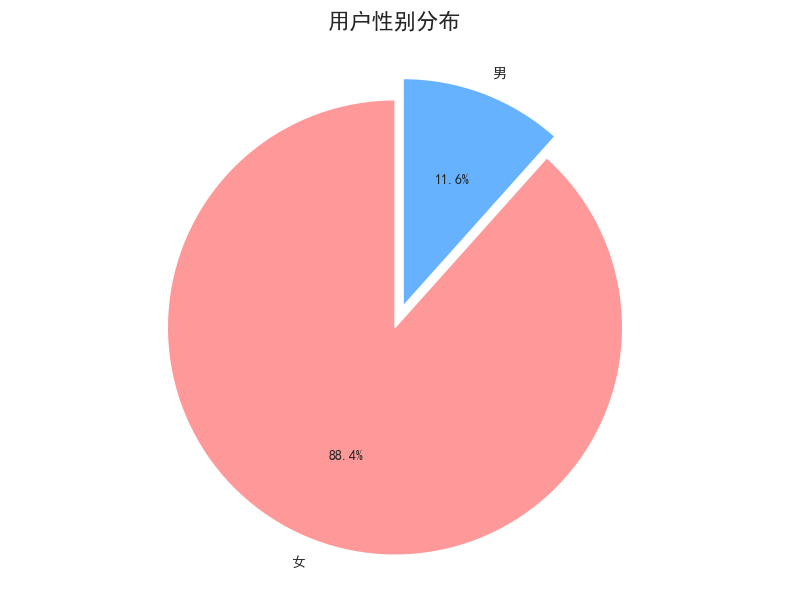

用户性别分布统计:
女: 316946 人 (88.4%)
男: 41638 人 (11.6%)


In [25]:
# 1. 用户性别分布 - 饼状图
plt.figure(figsize=(8, 6))

# 统计性别分布
gender_counts = df['user_gender'].value_counts()
colors = ['#FF9999', '#66B2FF']  # 只需要两个颜色

# 创建饼状图
explode_vals = (0.05, 0.05)  # 根据实际性别类别数量调整
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, explode=explode_vals)

plt.title('用户性别分布', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

print("用户性别分布统计:")
for gender, count in gender_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{gender}: {count} 人 ({percentage:.1f}%)")

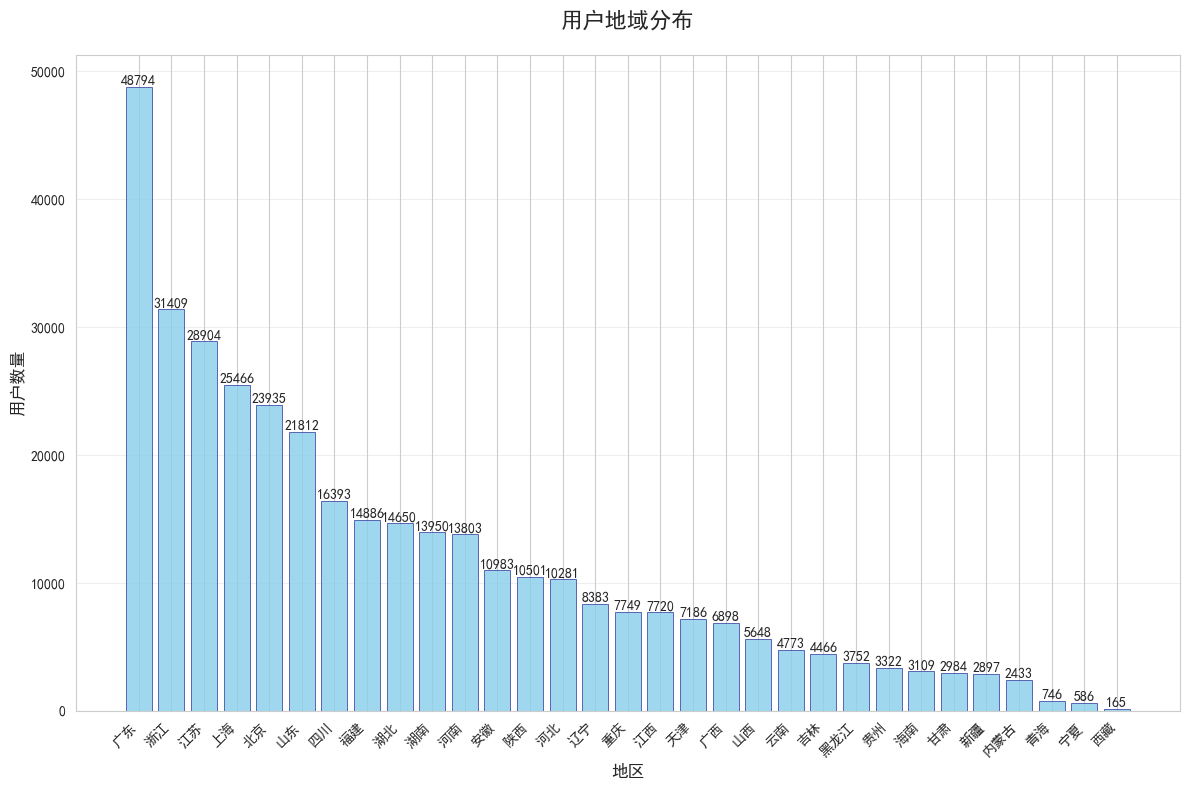

用户地域分布统计 (前10名):
 1. 广东: 48794 人 (13.6%)
 2. 浙江: 31409 人 (8.8%)
 3. 江苏: 28904 人 (8.1%)
 4. 上海: 25466 人 (7.1%)
 5. 北京: 23935 人 (6.7%)
 6. 山东: 21812 人 (6.1%)
 7. 四川: 16393 人 (4.6%)
 8. 福建: 14886 人 (4.2%)
 9. 湖北: 14650 人 (4.1%)
10. 湖南: 13950 人 (3.9%)


In [27]:
# 2. 用户地域分布 - 柱状图
plt.figure(figsize=(12, 8))

# 统计地域分布，只显示前15个最常见的地区
ip_counts = df['user_ip'].value_counts()

# 创建柱状图
bars = plt.bar(range(len(ip_counts)), ip_counts.values, 
               color='skyblue', alpha=0.8, edgecolor='navy', linewidth=0.5)

# 设置图表属性
plt.title('用户地域分布', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('地区', fontsize=12)
plt.ylabel('用户数量', fontsize=12)
plt.xticks(range(len(ip_counts)), ip_counts.index, rotation=45, ha='right')

# 在柱子上显示数值
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("用户地域分布统计 (前10名):")
for i, (region, count) in enumerate(ip_counts.head(10).items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i:2d}. {region}: {count} 人 ({percentage:.1f}%)")

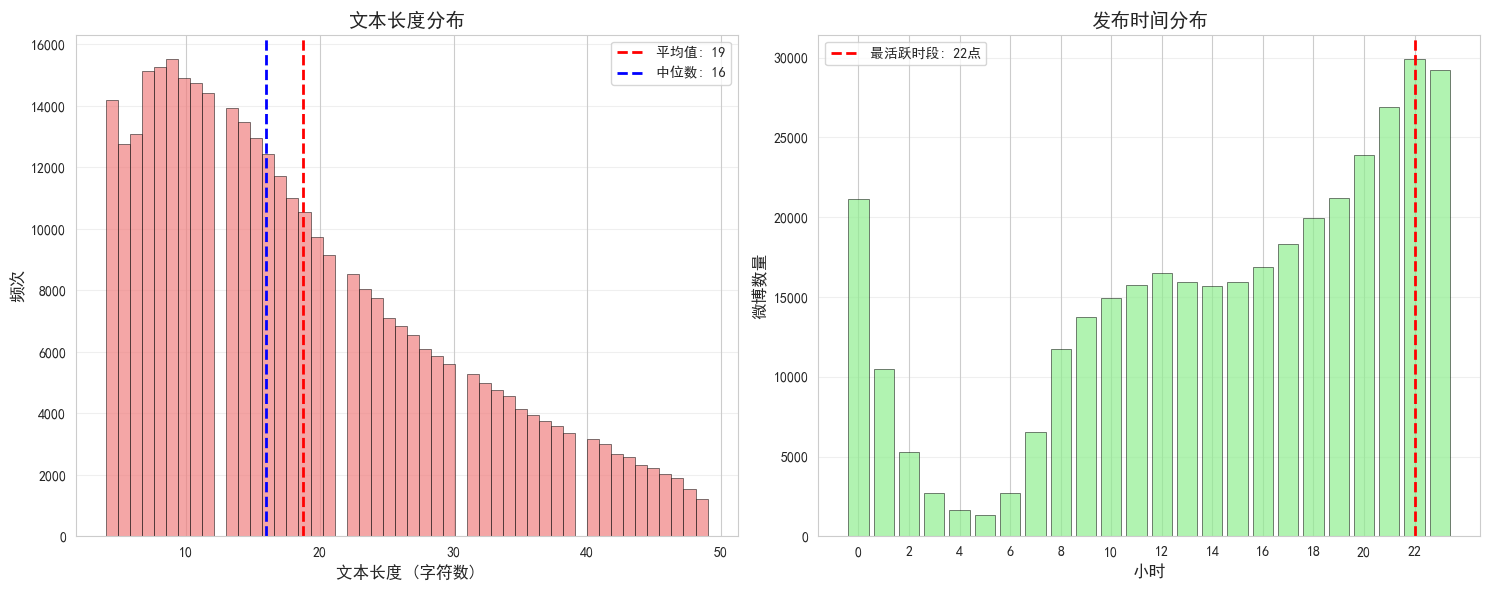

文本长度统计:
平均长度: 18.8 字符
中位数长度: 16.0 字符
最短文本: 4 字符
最长文本: 49 字符

发布时间统计:
最活跃时段: 22点 (29941 条微博)
最不活跃时段: 5点 (1346 条微博)


In [28]:
# 3. 文本长度与发布时间分析
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 左图：文本长度分布
ax1.hist(df['text_length'], bins=50, color='lightcoral', alpha=0.7, edgecolor='black', linewidth=0.5)
ax1.set_title('文本长度分布', fontsize=14, fontweight='bold')
ax1.set_xlabel('文本长度 (字符数)', fontsize=12)
ax1.set_ylabel('频次', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# 添加统计信息
mean_length = df['text_length'].mean()
median_length = df['text_length'].median()
ax1.axvline(mean_length, color='red', linestyle='--', linewidth=2, label=f'平均值: {mean_length:.0f}')
ax1.axvline(median_length, color='blue', linestyle='--', linewidth=2, label=f'中位数: {median_length:.0f}')
ax1.legend()

# 右图：发布时间分布
hour_counts = df['created_hour'].value_counts().sort_index()
ax2.bar(hour_counts.index, hour_counts.values, color='lightgreen', alpha=0.7, edgecolor='black', linewidth=0.5)
ax2.set_title('发布时间分布', fontsize=14, fontweight='bold')
ax2.set_xlabel('小时', fontsize=12)
ax2.set_ylabel('微博数量', fontsize=12)
ax2.set_xticks(range(0, 24, 2))
ax2.grid(axis='y', alpha=0.3)

# 标记最活跃时段
peak_hour = hour_counts.idxmax()
ax2.axvline(peak_hour, color='red', linestyle='--', linewidth=2, 
            label=f'最活跃时段: {peak_hour}点')
ax2.legend()

plt.tight_layout()
plt.show()

print("文本长度统计:")
print(f"平均长度: {df['text_length'].mean():.1f} 字符")
print(f"中位数长度: {df['text_length'].median():.1f} 字符")
print(f"最短文本: {df['text_length'].min()} 字符")
print(f"最长文本: {df['text_length'].max()} 字符")

print(f"\n发布时间统计:")
print(f"最活跃时段: {peak_hour}点 ({hour_counts[peak_hour]} 条微博)")
print(f"最不活跃时段: {hour_counts.idxmin()}点 ({hour_counts.min()} 条微博)")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24104\1050572664.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box1 = ax1.boxplot([df['likes']], patch_artist=True, labels=['点赞数'],
C:\Users\Administrator\AppData\Local\Temp\ipykernel_24104\1050572664.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box2 = ax2.boxplot([df['comments']], patch_artist=True, labels=['评论数'],
C:\Users\Administrator\AppData\Local\Temp\ipykernel_24104\1050572664.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box3 = ax3.boxplot([df['reposts']], patch_artist=True, labels=['转发数'],
C:\Users\Administrator\AppData\Local\Temp\ipyker

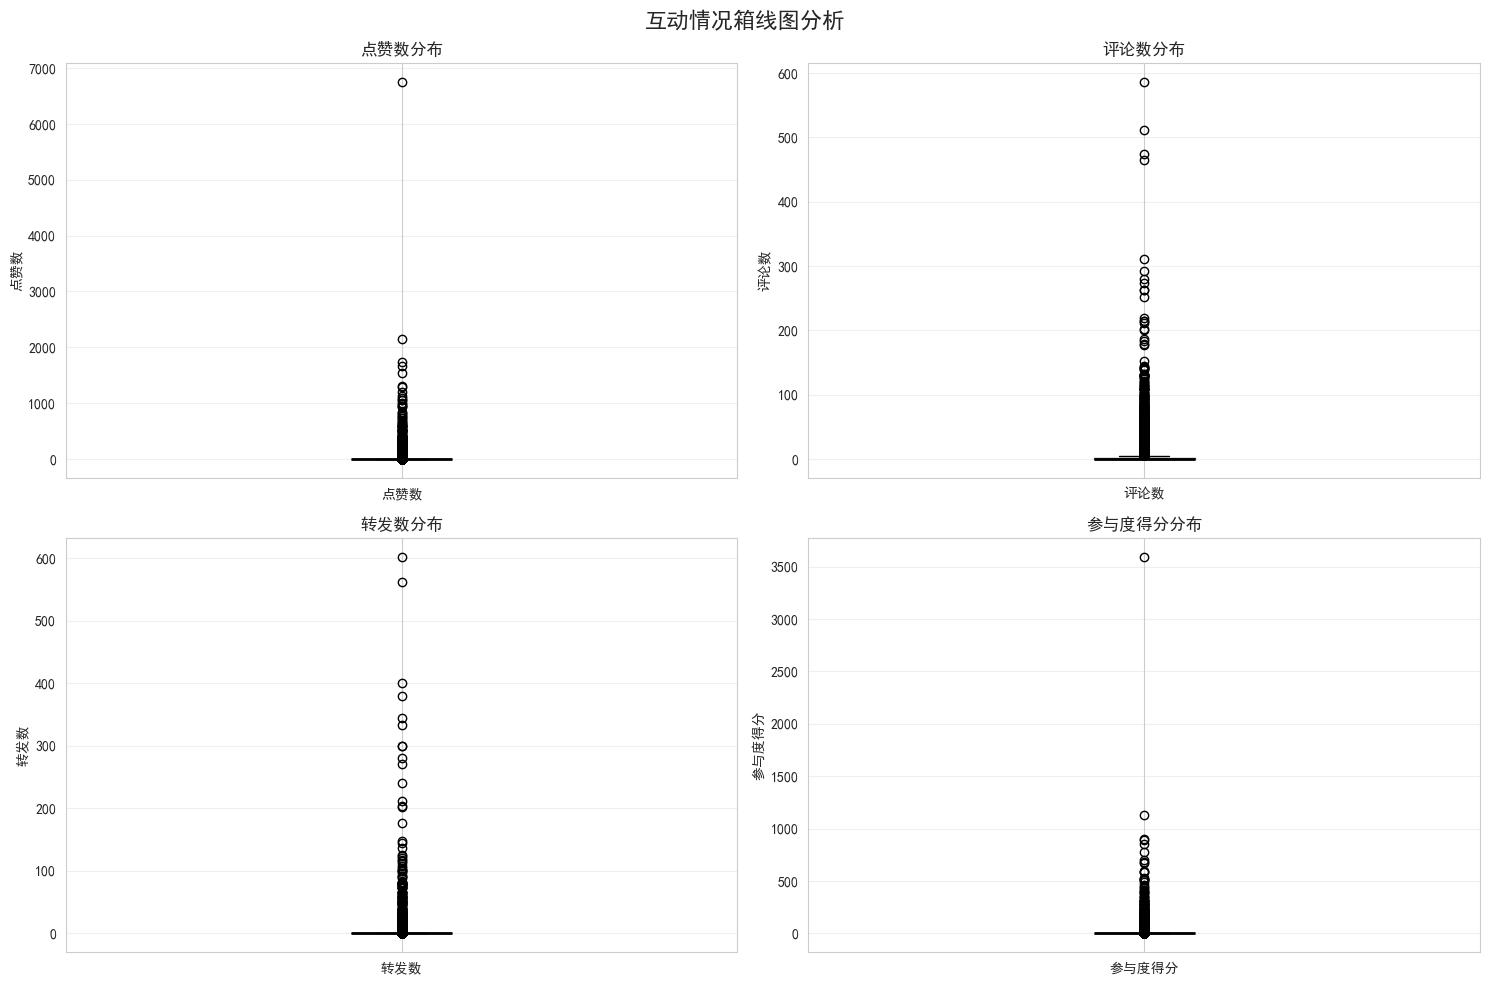

=== 互动数据统计摘要 ===

LIKES:
  平均值: 2.22
  中位数: 0.00
  最大值: 6749.00
  标准差: 17.41

COMMENTS:
  平均值: 1.38
  中位数: 0.00
  最大值: 586.00
  标准差: 4.26

REPOSTS:
  平均值: 0.07
  中位数: 0.00
  最大值: 602.00
  标准差: 2.56

ENGAGEMENT_SCORE:
  平均值: 1.54
  中位数: 0.50
  最大值: 3594.40
  标准差: 9.64

=== 最受欢迎的微博 ===
1. 参与度得分: 3594.40
   点赞: 6749, 评论: 511, 转发: 333
   内容: 谁把我炽的大垫音还回来...

2. 参与度得分: 1134.60
   点赞: 2145, 评论: 187, 转发: 30
   内容: 卧槽有人懂吗，我这半个月买了十条牛仔裤，终于买到各方面都很合适的这条了，有种苦尽甘来上岸的感觉...

3. 参与度得分: 903.00
   点赞: 1739, 评论: 95, 转发: 25
   内容: 七十多块的裤子这么好穿你不要命啦...



In [ ]:
# 4. 互动情况分析 - 箱线图
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 子图1：点赞数箱线图
box1 = ax1.boxplot([df['likes']], patch_artist=True, tick_labels=['点赞数'],
                   medianprops={'color': 'black', 'linewidth': 2})
box1['boxes'][0].set_facecolor('#FF6B6B')
box1['boxes'][0].set_alpha(0.7)
ax1.set_title('点赞数分布', fontsize=12, fontweight='bold')
ax1.set_ylabel('点赞数', fontsize=10)
ax1.grid(axis='y', alpha=0.3)

# 子图2：评论数箱线图
box2 = ax2.boxplot([df['comments']], patch_artist=True, tick_labels=['评论数'],
                   medianprops={'color': 'black', 'linewidth': 2})
box2['boxes'][0].set_facecolor('#4ECDC4')
box2['boxes'][0].set_alpha(0.7)
ax2.set_title('评论数分布', fontsize=12, fontweight='bold')
ax2.set_ylabel('评论数', fontsize=10)
ax2.grid(axis='y', alpha=0.3)

# 子图3：转发数箱线图
box3 = ax3.boxplot([df['reposts']], patch_artist=True, tick_labels=['转发数'],
                   medianprops={'color': 'black', 'linewidth': 2})
box3['boxes'][0].set_facecolor('#45B7D1')
box3['boxes'][0].set_alpha(0.7)
ax3.set_title('转发数分布', fontsize=12, fontweight='bold')
ax3.set_ylabel('转发数', fontsize=10)
ax3.grid(axis='y', alpha=0.3)

# 子图4：参与度得分箱线图
box4 = ax4.boxplot([df['engagement_score']], patch_artist=True, tick_labels=['参与度得分'],
                   medianprops={'color': 'black', 'linewidth': 2})
box4['boxes'][0].set_facecolor('#F7DC6F')
box4['boxes'][0].set_alpha(0.7)
ax4.set_title('参与度得分分布', fontsize=12, fontweight='bold')
ax4.set_ylabel('参与度得分', fontsize=10)
ax4.grid(axis='y', alpha=0.3)

plt.suptitle('互动情况箱线图分析', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 输出详细统计信息
print("=== 互动数据统计摘要 ===")
interaction_columns = ['likes', 'comments', 'reposts', 'engagement_score']
interaction_stats = df[interaction_columns].describe()

for col in interaction_columns:
    print(f"\n{col.upper()}:")
    print(f"  平均值: {df[col].mean():.2f}")
    print(f"  中位数: {df[col].median():.2f}")
    print(f"  最大值: {df[col].max():.2f}")
    print(f"  标准差: {df[col].std():.2f}")

# 找出最受欢迎的微博
print("\n=== 最受欢迎的微博 ===")
top_engagement = df.nlargest(3, 'engagement_score')[['text', 'likes', 'comments', 'reposts', 'engagement_score']]
for i, (idx, row) in enumerate(top_engagement.iterrows(), 1):
    print(f"{i}. 参与度得分: {row['engagement_score']:.2f}")
    print(f"   点赞: {row['likes']}, 评论: {row['comments']}, 转发: {row['reposts']}")
    print(f"   内容: {row['text'][:50]}...")
    print()

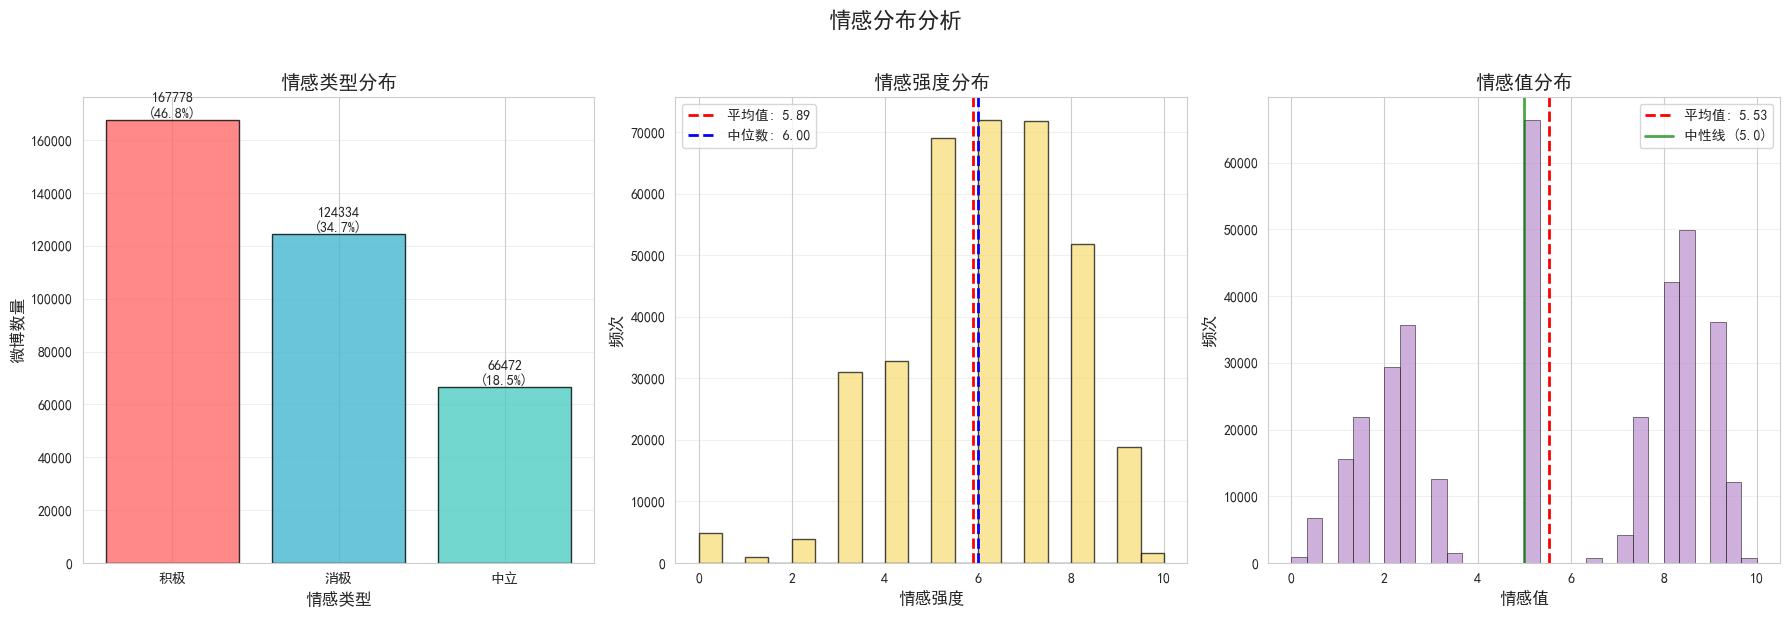

=== 情感分析统计摘要 ===
1. 情感类型分布:
   积极: 167778 条 (46.8%)
   消极: 124334 条 (34.7%)
   中立: 66472 条 (18.5%)

2. 情感强度统计:
   平均强度: 5.891
   中位数强度: 6.000
   强度范围: 0.000 - 10.000
   标准差: 1.837

3. 情感值统计:
   平均情感值: 5.527
   中位数情感值: 5.000
   情感值范围: 0.000 - 10.000
   标准差: 2.942

4. 各情感类型的平均强度:
   积极: 6.768
   消极: 6.090
   中立: 3.303

5. 各情感类型的平均情感值:
   积极: 8.384
   中立: 5.000
   消极: 1.955


In [33]:
# 5. 情感分布分析
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# 子图1：情感类型分布 - 柱状图
sentiment_counts = df['sentiment_type'].value_counts()
colors_sentiment = ['#FF6B6B', '#45B7D1', '#4ECDC4']
bars1 = ax1.bar(sentiment_counts.index, sentiment_counts.values, 
                color=colors_sentiment, alpha=0.8, edgecolor='black')

ax1.set_title('情感类型分布', fontsize=14, fontweight='bold')
ax1.set_xlabel('情感类型', fontsize=12)
ax1.set_ylabel('微博数量', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# 在柱子上显示数值和百分比
for bar in bars1:
    height = bar.get_height()
    percentage = (height / len(df)) * 100
    ax1.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{int(height)}\n({percentage:.1f}%)', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# 子图2：情感强度分布 - 直方图
ax2.hist(df['sentiment_intensity'], bins=20, color='#F7DC6F', alpha=0.7, 
         edgecolor='black')
ax2.set_title('情感强度分布', fontsize=14, fontweight='bold')
ax2.set_xlabel('情感强度', fontsize=12)
ax2.set_ylabel('频次', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

# 添加平均值和中位数线
intensity_mean = df['sentiment_intensity'].mean()
intensity_median = df['sentiment_intensity'].median()
ax2.axvline(intensity_mean, color='red', linestyle='--', linewidth=2, 
            label=f'平均值: {intensity_mean:.2f}')
ax2.axvline(intensity_median, color='blue', linestyle='--', linewidth=2, 
            label=f'中位数: {intensity_median:.2f}')
ax2.legend()

# 子图3：情感值分布 - 直方图
ax3.hist(df['sentiment_value'], bins=30, color='#BB8FCE', alpha=0.7, 
         edgecolor='black', linewidth=0.5)
ax3.set_title('情感值分布', fontsize=14, fontweight='bold')
ax3.set_xlabel('情感值', fontsize=12)
ax3.set_ylabel('频次', fontsize=12)
ax3.grid(axis='y', alpha=0.3)

# 添加平均值线和区间标记
value_mean = df['sentiment_value'].mean()
ax3.axvline(value_mean, color='red', linestyle='--', linewidth=2, 
            label=f'平均值: {value_mean:.2f}')
ax3.axvline(5.0, color='green', linestyle='-', linewidth=2, alpha=0.7, 
            label='中性线 (5.0)')
ax3.legend()

plt.suptitle('情感分布分析', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 详细统计信息
print("=== 情感分析统计摘要 ===")

print("1. 情感类型分布:")
for sentiment, count in sentiment_counts.items():
    percentage = (count / len(df)) * 100
    print(f"   {sentiment}: {count} 条 ({percentage:.1f}%)")

print(f"\n2. 情感强度统计:")
print(f"   平均强度: {df['sentiment_intensity'].mean():.3f}")
print(f"   中位数强度: {df['sentiment_intensity'].median():.3f}")
print(f"   强度范围: {df['sentiment_intensity'].min():.3f} - {df['sentiment_intensity'].max():.3f}")
print(f"   标准差: {df['sentiment_intensity'].std():.3f}")

print(f"\n3. 情感值统计:")
print(f"   平均情感值: {df['sentiment_value'].mean():.3f}")
print(f"   中位数情感值: {df['sentiment_value'].median():.3f}")
print(f"   情感值范围: {df['sentiment_value'].min():.3f} - {df['sentiment_value'].max():.3f}")
print(f"   标准差: {df['sentiment_value'].std():.3f}")

# 情感类型与强度的交叉分析
print(f"\n4. 各情感类型的平均强度:")
sentiment_intensity_mean = df.groupby('sentiment_type')['sentiment_intensity'].mean().sort_values(ascending=False)
for sentiment, avg_intensity in sentiment_intensity_mean.items():
    print(f"   {sentiment}: {avg_intensity:.3f}")

print(f"\n5. 各情感类型的平均情感值:")
sentiment_value_mean = df.groupby('sentiment_type')['sentiment_value'].mean().sort_values(ascending=False)
for sentiment, avg_value in sentiment_value_mean.items():
    print(f"   {sentiment}: {avg_value:.3f}")

In [42]:
def save_to_csv(df, file_path):
    """
    将 DataFrame 保存为 CSV 文件

    Args:
        df (pd.DataFrame): 需要保存的 DataFrame
        file_path (str): 保存的文件路径
    """
    df.to_csv(file_path, index=False, encoding='utf-8-sig')  # 使用 utf-8-sig 编码以支持 Excel 正确显示中文

save_to_csv(df, "weibo_after_fe.csv")